### Deep Learning Practical - 3

Title - Recurrent neural network (RNN) : Use the Google stock prices dataset and design a time series analysis and prediction system using RNN.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_train = pd.read_csv(r'/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
training_set.shape

(1258, 1)

In [5]:
 from sklearn.preprocessing import MinMaxScaler
 sc = MinMaxScaler(feature_range = (0, 1))
 training_set_scaled = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []
for i in range(60, 1257):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
 X_train.shape

(1197, 60, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
regressor = Sequential()

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [13]:
 regressor.add(LSTM(units = 50, return_sequences = True))
 regressor.add(Dropout(0.2))

In [14]:
regressor.add(Dense(units = 1))

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
 regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.1778
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0872
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0799
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0829
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0775
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0772
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0780
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0771
Epoch 9/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0775
Epoch 10/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0787
Epoch 11/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0783
Epoch 12/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0781
Epoch 13/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0807
Epoch 14/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0783
Epoch 15/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step -

In [17]:
dataset_test = pd.read_csv(r'/content/Google_Stock_Price_Train.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [19]:
inputs.shape

(1318, 1)

In [27]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

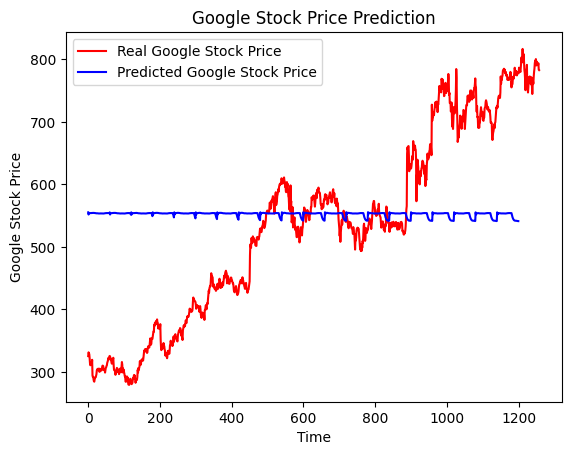

In [28]:
plt.plot(real_stock_price, color = 'red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()